In [ ]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 21

## Analyzing RCTs ##

Botulinum Toxin A (bta) as a treatment to chronic back pain
- 15 in the treatment group
- 16 in the control group (normal saline)

Trials were run double-blind (neither doctors nor patients knew which group they were in)
Result: 
  - 1 indicates pain relief
  - 0 indicates lack of pain relief 


In [ ]:
bta = Table.read_table('bta.csv')
bta.show()

In [ ]:
# get the counts in the treatment and control groups
bta.group('Group', sum)

In [ ]:
# get the proportions in the treatment and control groups
bta.group('Group', np.average)

In [ ]:
# looking at observed/potential outcomes table
# observed_outcomes = Table.read_table('observed_outcomes.csv')
# observed_outcomes.show()

In [ ]:
# calculate the difference in proportions of treatment minus control
group_proportions = bta.group('Group', np.average).column(1)
group_proportions.item(1) - group_proportions.item(0)

In [ ]:
# create a function that calculates the difference of proportions of treatment minus control
def distance_between_group_proportions(tbl):
    proportions = tbl.group('Group', np.average).column(1)
    return proportions.item(1) - proportions.item(0)

In [ ]:
# store the real difference in a name
observed_distance = distance_between_group_proportions(bta)
observed_distance

In [ ]:
# get tables with just the group labels, and just the result values
labels = bta.select('Group')
results = bta.select('Result')

In [ ]:
# Create a null distribution
distances = make_array()
for i in np.arange(2000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    simulated = labels.with_column('Shuffled results', shuffled_results)
    distance = distance_between_group_proportions(simulated)
    distances = np.append(distances, distance)

distances

In [ ]:
# visualize the null distribution
Table().with_column('Distance', distances).hist(bins = np.arange(0, 1, 0.15))
plots.scatter(observed_distance, 0, color='red', s=40);

In [ ]:
np.average(distances >= observed_distance)

## Percentiles

In [43]:
s = make_array(1, 7, 3, 9, 5)   #could also use:  s = [1, 7, 3, 9, 5]
s

array([1, 7, 3, 9, 5], dtype=int64)

In [41]:
np.sort(s)

array([1, 3, 5, 7, 9], dtype=int64)

In [44]:
percentile(10, s)

1

In [45]:
percentile(20, s)

1

In [46]:
percentile(21, s)

3

In [47]:
# Let's look at another example with an array that has 6 elements
x = make_array(43, 20, 51, 7, 28, 34)
y = np.sort(x)
y

array([ 7, 20, 28, 34, 43, 51], dtype=int64)

In [55]:
# let's get the sorted data index of the element at the 55th percentile
np.ceil(.55 * len(x))

4.0

In [49]:
# get the 55th percentile
percentile(55, x)

34

In [56]:
# let's get the sorted data index of the element at the 95th percentile 
np.ceil(.95 * len(x))

6.0

## Estimation

In [57]:
# Compensation data for employees of the city of San Francisco in 2015
sf = Table.read_table('san_francisco_2015.csv')
sf

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,2,"Public Works, Transportation & Commerce",WTR,PUC Water Department,21,"Prof & Tech Engineers - Miscellaneous, Local 21",2400,"Lab, Pharmacy & Med Techs",2481,Water Qualitytech I/II,21538,82146,0,0,82146,16942.2,12340.9,6337.73,35620.8,117767
Calendar,2015,2,"Public Works, Transportation & Commerce",DPW,General Services Agency - Public Works,12,"Carpet, Linoleum and Soft Tile Workers, Local 12",7300,Journeyman Trade,7393,Soft Floor Coverer,5459,32165.8,973.19,848.96,33987.9,0,4587.51,2634.42,7221.93,41209.8
Calendar,2015,4,Community Health,DPH,Public Health,790,"SEIU - Miscellaneous, Local 1021",1600,"Payroll, Billing & Accounting",1636,Health Care Billing Clerk 2,41541,71311,5757.98,0,77069,14697.6,12424.5,6370.06,33492.2,110561
Calendar,2015,4,Community Health,DPH,Public Health,351,Municipal Executive Association - Miscellaneous,0900,Management,2620,Food Service Mgr Administrator,26718,28430.2,0,763.07,29193.3,0,4223.14,5208.51,9431.65,38625
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,790,"SEIU - Miscellaneous, Local 1021",8200,Protection & Apprehension,8201,School Crossing Guard,45810,7948.75,0,0,7948.75,0,2873.17,616.24,3489.41,11438.2
Calendar,2015,1,Public Protection,POL,Police,911,Police Officers' Association,Q000,Police Services,Q002,Police Officer,32906,2235,0,0,2235,490.36,286.72,176.57,953.65,3188.65
Calendar,2015,4,Community Health,DPH,Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2300,Nursing,2328,Nurse Practitioner,7506,187247,0,11704.1,198951,37683.7,12424.5,11221.7,61329.9,260281
Calendar,2015,2,"Public Works, Transportation & Commerce",MTA,Municipal Transportation Agency,253,"Transport Workers - Transit Operators, Local 250-A",9100,Street Transit,9163,Transit Operator,36773,66988.5,3512.88,2770.39,73271.8,19127.2,13203,5455.1,37785.3,111057
Calendar,2015,6,General Administration & Finance,CAT,City Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),12963,135190,0,1562.5,136752,27501.8,12424.5,10103,50029.3,186781
Calendar,2015,3,Human Welfare & Neighborhood Development,DSS,Human Services,535,"SEIU - Human Services, Local 1021",9700,Community Development,9703,Emp & Training Spec 2,35179,70474.8,147.28,1647.24,72269.3,14650.3,10696.9,5993.11,31340.3,103610


In [58]:
# Look at the Mayor's salary 
# (lot of other interesting things you can look at in the data too)
sf.where('Job', 'Mayor')

Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
Calendar,2015,6,General Administration & Finance,MYR,Mayor,556,Elected Officials,1100,Administrative & Mgmt (Unrep),1190,Mayor,22433,288964,0,0,288964,58117,12424.5,20293,90834.5,379798


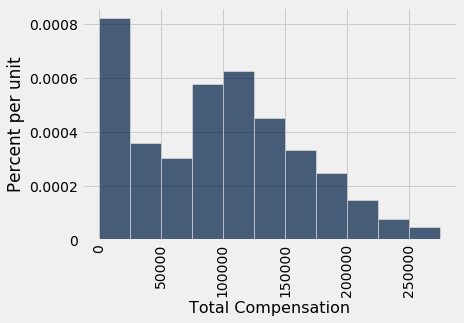

In [64]:
# distribution of SF employee total compensation
sf_bins = np.arange(0, 300000, 25000)
sf.hist('Total Compensation', bins=sf_bins)

In [60]:
# Median total compensation of SF employees (population parameter)
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

98174.9

In [61]:
# suppose we only had a sample of 300 employees
our_sample = sf.sample(300, with_replacement=False)

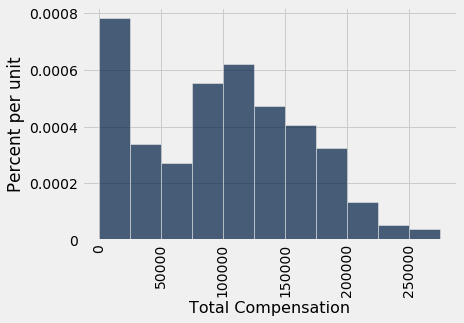

In [65]:
# Let's look at the empirical distribution of our sample
our_sample.hist('Total Compensation', bins=sf_bins)

In [66]:
est_median = percentile(50, our_sample.column('Total Compensation'))
est_median

102844.45

## The Bootstrap

In [67]:
# resample from our original sample to get a bootstrap sample
resample1 = our_sample.sample()

In [68]:
# calculate the median from our bootstrap sample (i.e., get a bootstrap statistic)
percentile(50, resample1.column('Total Compensation'))

106792.51

In [69]:
# get a full bootstrap distribution
def bootstrap_median(original_sample, label, replications):
    """Simulate sample median:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    Returns array of bootstrap sample medians
    """
    medians = make_array()
    for i in np.arange(replications):
        bootstrap_sample = original_sample.sample()
        resampled_median = percentile(50, bootstrap_sample.column(label))
        medians = np.append(medians, resampled_median)
        
    return medians

In [70]:
# get a bootstrap distribution with 2000 bootstrap statistics from our one sample
bstrap_medians = bootstrap_median(our_sample, 'Total Compensation', 2000)

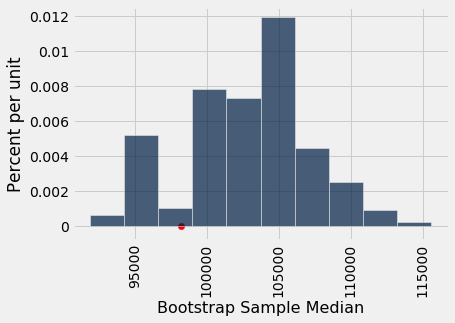

In [72]:
# visualize the bootstrap distribution
resampled_medians = Table().with_column(
    'Bootstrap Sample Median', bstrap_medians)

resampled_medians.hist()

plots.scatter(pop_median, 0, color='red', s=40);

In [73]:
# get a range of plausible values for where the population parameter could be
left = percentile(2.5, bstrap_medians)
right = percentile(97.5, bstrap_medians)
confidence_interval = make_array(left, right)
confidence_interval

[94353.44, 110901.63]

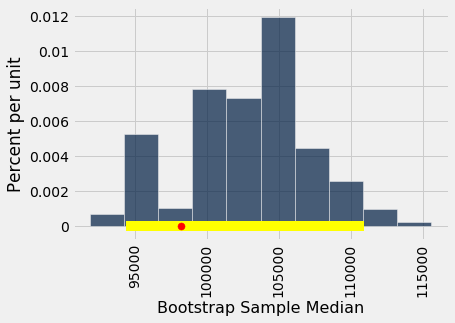

In [75]:
resampled_medians.hist()

plots.plot([left, right], [0, 0], color='yellow', lw=10, zorder=1)
plots.scatter(pop_median, 0, color='red', s=50, zorder=2);